In [2]:
import pandas as pd
import os

# --- Configuración de Rutas ---
# '..' significa "subir un nivel" desde la carpeta actual (notebooks/) para luego entrar a data/
DATA_PATH = os.path.join('..', 'data')

applicants_path = os.path.join(DATA_PATH, 'applicants.json')
prospects_path = os.path.join(DATA_PATH, 'prospects.json')
vagas_path = os.path.join(DATA_PATH, 'vagas.json') 

# --- Carga de Archivos JSON ---
try:
    print("Cargando applicants.json...")
    # Usamos orient='index' porque el JSON es un diccionario de diccionarios, donde las claves son los IDs.
    df_applicants = pd.read_json(applicants_path, orient='index')
    print(f"Cargado con éxito. Dimensiones: {df_applicants.shape}")

    print("\nCargando prospects.json...")
    df_prospects = pd.read_json(prospects_path, orient='index')
    print(f"Cargado con éxito. Dimensiones: {df_prospects.shape}")

    print("\nCargando vagas.json...")
    df_vagas = pd.read_json(vagas_path, orient='index')
    print(f"Cargado con éxito. Dimensiones: {df_vagas.shape}")

except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo. Revisa que los archivos JSON estén en la carpeta /data.")
    print(e)

Cargando applicants.json...
Cargado con éxito. Dimensiones: (42482, 7)

Cargando prospects.json...
Cargado con éxito. Dimensiones: (14222, 3)

Cargando vagas.json...
Cargado con éxito. Dimensiones: (14081, 3)


In [3]:
# Inspeccionamos el contenido de la primera fila en la columna 'infos_basicas'
primer_registro = df_applicants['infos_basicas'].iloc[0]
print(primer_registro)

{'telefone_recado': '', 'telefone': '(11) 97048-2708', 'objetivo_profissional': '', 'data_criacao': '10-11-2021 07:29:49', 'inserido_por': 'Luna Correia', 'email': 'carolina_aparecida@gmail.com', 'local': '', 'sabendo_de_nos_por': '', 'data_atualizacao': '10-11-2021 07:29:49', 'codigo_profissional': '31000', 'nome': 'Carolina Aparecida'}


In [4]:
# --- Aplanar df_applicants ---
print("Aplanando df_applicants...")

# Normalizamos cada columna que contiene diccionarios y las unimos
applicants_flat_parts = [pd.json_normalize(df_applicants[col]) for col in ['infos_basicas', 'informacoes_pessoais', 'informacoes_profissionais', 'formacao_e_idiomas', 'cargo_atual']]

# Extraemos las columnas que no son diccionarios (como cv_pt)
applicants_simple_cols = df_applicants[['cv_pt', 'cv_en']].reset_index(drop=True)

# Unimos todas las partes en un único DataFrame plano
df_applicants_flat = pd.concat([applicants_simple_cols] + applicants_flat_parts, axis=1)

print("df_applicants aplanado con éxito.")


# --- Aplanar df_vagas ---
print("\nAplanando df_vagas...")

# Hacemos lo mismo para el DataFrame de vacantes
vagas_flat_parts = [pd.json_normalize(df_vagas[col]) for col in ['informacoes_basicas', 'perfil_vaga', 'beneficios']]

# Unimos las partes del DataFrame de vacantes
df_vagas_flat = pd.concat(vagas_flat_parts, axis=1)

print("df_vagas aplanado con éxito.")


# --- Verificamos los resultados ---
print("\n--- Muestra de Applicants Aplanado ---")
print(f"Nuevas dimensiones: {df_applicants_flat.shape}")
display(df_applicants_flat.head())

print("\n--- Muestra de Vagas Aplanado ---")
print(f"Nuevas dimensiones: {df_vagas_flat.shape}")
display(df_vagas_flat.head())

Aplanando df_applicants...
df_applicants aplanado con éxito.

Aplanando df_vagas...
df_vagas aplanado con éxito.

--- Muestra de Applicants Aplanado ---
Nuevas dimensiones: (42482, 57)


,cv_pt,cv_en,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,...,id_ibrati,email_corporativo,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,assistente administrativo\n\n\nsantosbatista\n...,,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,formação acadêmica\nensino médio (2º grau) em ...,,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,objetivo: área administrativa | financeira\n\n...,,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,formação\nensino médio completo\ninformática i...,,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,última atualização em 09/11/2021\n­ sp\n\nensi...,,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- Muestra de Vagas Aplanado ---
Nuevas dimensiones: (14081, 44)


,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,tipo_contratacao,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,CLT Full,...,TI - Sistemas e Ferramentas-,Operations Lead\n\nRoles & Responsibilities:\n...,Required Skills:\n• Prior experience in Cloud ...,100% Remoto Período – entre 5 – 6 meses,,Nenhum -,NaN,-,R$,
1,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,CLT Full,...,TI - Desenvolvimento/Programação-,Consultor PP/QM Sr.\n\n• Consultor PP/QM Sênio...,• Consultor PP/QM Sênior com experiencia em pr...,• Início: Imediato • Fim: Jan/22,,Nenhum -,NaN,-,R$,
2,04-05-2021,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Ana Albuquerque,CLT Full,...,TI - Sistemas e Ferramentas-,Descrição – Atividades:\n\no Monitoramento das...,Requisitos mandatórios:\n\no Conhecimentos Téc...,Localização: Remoto Perfil: Analista Pleno ou ...,,Nenhum -,NaN,-,R$,
3,04-05-2021,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,Decision São Paulo,Cecília Freitas,Clara Rios,"PJ/Autônomo, CLT Full",...,TI - Projetos-,Descrição/Comentário: Architecture Frameworks ...,Descrição/Comentário: Architecture Frameworks ...,Budgeted Rate - indicate currency and type (ho...,Não,Notebook padrão -,NaN,- p/ mês (168h),fechado,
4,04-05-2021,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,CLT Full,...,TI - SAP-,Experiência como Consultor SAP AUTHORIZATION (...,Experiência como Consultor SAP AUTHORIZATION (...,contratação CLT full pela Decision locação rem...,Sim,Nenhum -,NaN,-,R$,


In [5]:
import pandas as pd

# --- Paso 1: Procesar df_prospects (esta lógica es correcta, el problema estaba en los nombres de las claves) ---
print("Procesando df_prospects...")
df_prospects_reset = df_prospects.reset_index().rename(columns={'index': 'id_vaga'})
df_prospects_exploded = df_prospects_reset.explode('prospects').reset_index(drop=True)
prospects_details = pd.json_normalize(df_prospects_exploded['prospects'])
df_prospects_clean = pd.concat([df_prospects_exploded['id_vaga'], prospects_details], axis=1)
print(f"Tabla de aplicaciones creada. Dimensiones: {df_prospects_clean.shape}")

# --- Paso 2: Unir Prospects con Applicants (VERSIÓN CORREGIDA) ---
print("\nUniendo aplicaciones con datos de candidatos...")

# CORRECCIÓN: Usamos 'codigo' de prospects y 'codigo_profissional' de applicants.
# Nos aseguramos que ambas claves de unión sean del mismo tipo (texto).
df_prospects_clean['codigo'] = df_prospects_clean['codigo'].astype(str)
df_applicants_flat['codigo_profissional'] = df_applicants_flat['codigo_profissional'].astype(str)

# Hacemos el merge usando las claves correctas para cada tabla.
df_merged = pd.merge(
    df_prospects_clean, 
    df_applicants_flat, 
    left_on='codigo',          # Columna de df_prospects_clean
    right_on='codigo_profissional', # Columna de df_applicants_flat
    how='left'
)

# --- Paso 3: Unir el resultado con Vagas (sin cambios) ---
print("Uniendo con datos de vacantes...")
df_merged['id_vaga'] = df_merged['id_vaga'].astype(str)
df_vagas_flat.index = df_vagas_flat.index.astype(str)
df_maestro = pd.merge(df_merged, df_vagas_flat, left_on='id_vaga', right_index=True, how='left')

# --- Paso 4: Crear la Variable Objetivo (VERSIÓN CORREGIDA) ---
# CORRECCIÓN: Usamos 'situacao_candidado' en lugar de 'situacao'
df_maestro['contratado'] = df_maestro['situacao_candidado'].apply(lambda x: 1 if x == 'Contratado' else 0)

# --- Paso 5: Verificación Final ---
print("\n¡Dataset Maestro creado con éxito!")
print(f"Dimensiones finales: {df_maestro.shape}")
print("\nDistribución de la variable objetivo (Contratado):")
print(df_maestro['contratado'].value_counts(dropna=False)) # Usamos dropna=False para ver si hay nulos

print("\n--- Muestra del Dataset Maestro ---")
display(df_maestro.head())

Procesando df_prospects...
Tabla de aplicaciones creada. Dimensiones: (56702, 8)

Uniendo aplicaciones con datos de candidatos...
Uniendo con datos de vacantes...

¡Dataset Maestro creado con éxito!
Dimensiones finales: (56702, 110)

Distribución de la variable objetivo (Contratado):
contratado
0    56702
Name: count, dtype: int64

--- Muestra del Dataset Maestro ---


,id_vaga,nome_x,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,cv_pt,cv_en,...,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2,contratado
0,4530,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,\ndados pessoais\nestado civil: casado\nidade:...,,...,- Act as Regional Service Deliver Manager with...,São Paulo/SP,,,,NaN,-,"00,00",,0
1,4530,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,"solteiro, 47 anos\n\nestrada meringuava, nº 17...",,...,- Act as Regional Service Deliver Manager with...,São Paulo/SP,,,,NaN,-,"00,00",,0
2,4531,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,\n\nárea de atuação: lider de consultoria / ge...,,...,"Conhecimento de processos logísticos, compras,...",Desenvolvimento de projetos de melhorias e imp...,,,NaN,Tempo de projeto = 29/04/2022 com possibilidde...,-,Valor Aberto,,0
3,4531,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano,informações pessoais\n estado civil: casado\n...,,...,"Conhecimento de processos logísticos, compras,...",Desenvolvimento de projetos de melhorias e imp...,,,NaN,Tempo de projeto = 29/04/2022 com possibilidde...,-,Valor Aberto,,0
4,4532,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Implementação de empresa Brasil em S4 Hana Glo...,Inglês fluente\n\nRevisão de documentação BPD;...,Local = Remoto & Presencial em Campinas-SP (de...,,NaN,Tempo de projeto =\nData de início 07/02/2021\...,-,Valor Aberto,,0


In [6]:
# --- Paso 6: Corregir la Lógica de la Variable Objetivo ---

# Usamos .str.contains() para buscar la palabra 'Contratado' en cualquier parte del texto.
# na=False asegura que si la celda está vacía (NaN), se considere como un 0 (no contratado).
# .astype(int) convierte los resultados (True/False) en 1s y 0s.
df_maestro['contratado'] = df_maestro['situacao_candidado'].str.contains('Contratado', na=False).astype(int)

# --- Verifiquemos de nuevo la distribución ---
print("Distribución de la variable objetivo (CORREGIDA):")
print(df_maestro['contratado'].value_counts())

Distribución de la variable objetivo (CORREGIDA):
contratado
0    53718
1     2984
Name: count, dtype: int64


In [7]:
import pandas as pd

# Le pedimos a pandas que no limite el número de filas que nos muestra,
# para asegurarnos de ver todas las categorías.
pd.set_option('display.max_rows', 200)

# Obtenemos un conteo de cada valor único en la columna 'situacao_candidado'
conteo_situacao = df_maestro['situacao_candidado'].value_counts()

# Obtenemos el mismo conteo pero en porcentaje para tener una mejor perspectiva
porcentaje_situacao = df_maestro['situacao_candidado'].value_counts(normalize=True) * 100

# Unimos ambos resultados en una sola tabla para una fácil visualización
df_situacao_analysis = pd.DataFrame({
    'Conteo': conteo_situacao,
    'Porcentaje (%)': porcentaje_situacao.round(2)
})

print("--- Análisis de Frecuencia para 'situacao_candidado' ---")
# Usamos display() para que la tabla se vea bien en el notebook
display(df_situacao_analysis)

# Reseteamos la opción de visualización al valor por defecto
pd.reset_option('display.max_rows')


--- Análisis de Frecuencia para 'situacao_candidado' ---


,Conteo,Porcentaje (%)
situacao_candidado,,
Prospect,20021,37.24
Encaminhado ao Requisitante,16122,29.99
Inscrito,3980,7.40
Não Aprovado pelo Cliente,3492,6.50
Contratado pela Decision,2758,5.13
Desistiu,2349,4.37
Não Aprovado pelo RH,1765,3.28
Não Aprovado pelo Requisitante,765,1.42
Entrevista Técnica,579,1.08


In [19]:
# --- Módulo 1, Paso 6 (VERSIÓN FINAL): Lógica Definitiva de la Variable Objetivo ---

# Basado en nuestro análisis, estas son las palabras clave que definen un 'éxito'.
# Unimos las palabras con '|' que funciona como un 'OR'.
expresion_final_exito = 'Contratado|Aprovado|Documentação|Proposta Aceita'

# Creamos la columna 'contratado' aplicando esta regla final.
df_maestro['contratado'] = df_maestro['situacao_candidado'].str.contains(
    expresion_final_exito, 
    na=False, 
    case=False
).astype(int)

# --- Verifiquemos la distribución final y definitiva ---
print("Distribución de la variable objetivo (VERSIÓN FINAL Y DEFINITIVA):")
print(df_maestro['contratado'].value_counts())

Distribución de la variable objetivo (VERSIÓN FINAL Y DEFINITIVA):
contratado
0    47477
1     9225
Name: count, dtype: int64


In [8]:
print(f"Dimensiones originales del Dataset Maestro: {df_maestro.shape}")

# Creamos una copia para no modificar el DataFrame maestro original
df_cleaned = df_maestro.copy()

# --- 1. Análisis de Nulos (solo para informar) ---
missing_values = df_cleaned.isnull().sum()
missing_percentage = (missing_values / len(df_cleaned)) * 100
missing_info = pd.DataFrame({'count': missing_values, 'percentage': missing_percentage})


# --- 2. Eliminar columnas con un porcentaje de nulos muy alto (ej. > 80%) ---
cols_to_drop_high_null = missing_info[missing_info['percentage'] > 80].index
df_cleaned.drop(columns=cols_to_drop_high_null, inplace=True, errors='ignore')
print(f"\nSe eliminaron {len(cols_to_drop_high_null)} columnas por tener más de 80% de valores nulos.")


# --- 3. Eliminar columnas de identificadores/texto libre que no usaremos ---
cols_to_drop_identifiers = [
    'nome_x', 'codigo', 'email', 'nome_y', 'comentario', 'recrutador', 
    'cpf', 'telefone_celular', 'url_linkedin', 'facebook', 'skype', 
    'telefone_recado', 'telefone', 'email_secundario', 'data_aceite',
    'fonte_indicacao', 'endereco', 'objetivo_profissional', 'titulo_profissional',
    'situacao_candidado', 'data_candidatura', 'ultima_atualizacao' # Ya extrajimos la info que necesitábamos de estas
]
existing_cols_to_drop = [col for col in cols_to_drop_identifiers if col in df_cleaned.columns]
df_cleaned.drop(columns=existing_cols_to_drop, inplace=True, errors='ignore')
print(f"Se eliminaron {len(existing_cols_to_drop)} columnas de identificadores y texto irrelevante.")


# --- 4. Rellenar (imputar) nulos restantes ---
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('No Informado')
print("Valores nulos en columnas de texto se rellenaron con 'No Informado'.")

numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(0)
print("Valores nulos en columnas numéricas se rellenaron con 0.")


# --- 5. Verificación final ---
print(f"\nTotal de valores nulos restantes en el dataset: {df_cleaned.isnull().sum().sum()}")
print(f"Dimensiones después de la limpieza: {df_cleaned.shape}")
display(df_cleaned.head())

Dimensiones originales del Dataset Maestro: (56702, 110)

Se eliminaron 19 columnas por tener más de 80% de valores nulos.
Se eliminaron 21 columnas de identificadores y texto irrelevante.
Valores nulos en columnas de texto se rellenaron con 'No Informado'.
Valores nulos en columnas numéricas se rellenaron con 0.

Total de valores nulos restantes en el dataset: 0
Dimensiones después de la limpieza: (56702, 67)


,id_vaga,cv_pt,cv_en,telefone_x,data_criacao,inserido_por,local,sabendo_de_nos_por,data_atualizacao,codigo_profissional,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2,contratado
0,4530,\ndados pessoais\nestado civil: casado\nidade:...,,(21) 93485-6494,25-03-2021 13:36:19,Ana Lívia Moreira,,,25-03-2021 13:36:19,25632,...,TI - Projetos-,- Act as Regional Service Deliver Manager with...,São Paulo/SP,,,,-,"00,00",,0
1,4530,"solteiro, 47 anos\n\nestrada meringuava, nº 17...",,(21) 94261-6276,22-03-2021 22:48:58,Ana Lívia Moreira,"Rio de Janeiro, Rio de Janeiro",Site de Empregos,22-03-2021 23:36:28,25529,...,TI - Projetos-,- Act as Regional Service Deliver Manager with...,São Paulo/SP,,,,-,"00,00",,0
2,4531,\n\nárea de atuação: lider de consultoria / ge...,,(21) 96332-6963,17-03-2021 09:41:10,Juliana Cassiano,"São Paulo, São Paulo",Site de Empregos,12-04-2021 12:15:57,25364,...,Gestão e Alocação de Recursos de TI-,"Conhecimento de processos logísticos, compras,...",Desenvolvimento de projetos de melhorias e imp...,,,No Informado,-,Valor Aberto,,1
3,4531,informações pessoais\n estado civil: casado\n...,,(11) 97744-8180,17-03-2021 08:20:21,Juliana Cassiano,,,17-03-2021 08:20:21,25360,...,Gestão e Alocação de Recursos de TI-,"Conhecimento de processos logísticos, compras,...",Desenvolvimento de projetos de melhorias e imp...,,,No Informado,-,Valor Aberto,,0
4,4532,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,...,Gestão e Alocação de Recursos de TI-,Implementação de empresa Brasil em S4 Hana Glo...,Inglês fluente\n\nRevisão de documentação BPD;...,Local = Remoto & Presencial em Campinas-SP (de...,,No Informado,-,Valor Aberto,,0


In [9]:
import re

# Hacemos una copia para trabajar de forma segura
df_processed = df_cleaned.copy()

def limpiar_valor_monetario(valor):
    # Si el valor es un texto (string)
    if isinstance(valor, str):
        # Usamos expresiones regulares para eliminar todo lo que NO sea un dígito o una coma
        valor_limpio = re.sub(r'[^\d,]', '', valor)
        # Reemplazamos la coma decimal por un punto para que Python lo entienda como float
        valor_limpio = valor_limpio.replace(',', '.')
        # Si después de limpiar no queda nada (era un '-'), lo convertimos en 0
        if valor_limpio == '':
            return 0.0
        try:
            return float(valor_limpio)
        except ValueError:
            return 0.0
    # Si ya es un número (int o float), lo devolvemos tal cual
    elif isinstance(valor, (int, float)):
        return float(valor)
    # Para cualquier otro caso, devolvemos 0
    return 0.0

# Aplicamos esta función a las columnas problemáticas
print("Limpiando columnas 'valor_compra' y 'valor_venda'...")
for col in ['valor_compra_1', 'valor_compra_2', 'valor_venda']:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].apply(limpiar_valor_monetario)

print("Limpieza completada.")

# Verificamos que ahora son de tipo numérico (float64)
print("\nTipos de datos después de la limpieza específica:")
display(df_processed[['valor_compra_1', 'valor_compra_2', 'valor_venda']].info())

Limpiando columnas 'valor_compra' y 'valor_venda'...
Limpieza completada.

Tipos de datos después de la limpieza específica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   valor_compra_1  56702 non-null  float64
 1   valor_compra_2  56702 non-null  float64
 2   valor_venda     56702 non-null  float64
dtypes: float64(3)
memory usage: 1.3 MB


None

In [10]:
# 1. Muestra de las primeras filas para inspección visual
print("--- Muestra del DataFrame Procesado ---")
display(df_processed.head())

# 2. Resumen técnico completo con .info()
print("\n--- Informe de Tipos de Datos y Nulos (.info()) ---")
df_processed.info()

--- Muestra del DataFrame Procesado ---


,id_vaga,cv_pt,cv_en,telefone_x,data_criacao,inserido_por,local,sabendo_de_nos_por,data_atualizacao,codigo_profissional,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,valor_venda,valor_compra_1,valor_compra_2,contratado
0,4530,\ndados pessoais\nestado civil: casado\nidade:...,,(21) 93485-6494,25-03-2021 13:36:19,Ana Lívia Moreira,,,25-03-2021 13:36:19,25632,...,TI - Projetos-,- Act as Regional Service Deliver Manager with...,São Paulo/SP,,,,0.0,0.0,0.0,0
1,4530,"solteiro, 47 anos\n\nestrada meringuava, nº 17...",,(21) 94261-6276,22-03-2021 22:48:58,Ana Lívia Moreira,"Rio de Janeiro, Rio de Janeiro",Site de Empregos,22-03-2021 23:36:28,25529,...,TI - Projetos-,- Act as Regional Service Deliver Manager with...,São Paulo/SP,,,,0.0,0.0,0.0,0
2,4531,\n\nárea de atuação: lider de consultoria / ge...,,(21) 96332-6963,17-03-2021 09:41:10,Juliana Cassiano,"São Paulo, São Paulo",Site de Empregos,12-04-2021 12:15:57,25364,...,Gestão e Alocação de Recursos de TI-,"Conhecimento de processos logísticos, compras,...",Desenvolvimento de projetos de melhorias e imp...,,,No Informado,0.0,0.0,0.0,1
3,4531,informações pessoais\n estado civil: casado\n...,,(11) 97744-8180,17-03-2021 08:20:21,Juliana Cassiano,,,17-03-2021 08:20:21,25360,...,Gestão e Alocação de Recursos de TI-,"Conhecimento de processos logísticos, compras,...",Desenvolvimento de projetos de melhorias e imp...,,,No Informado,0.0,0.0,0.0,0
4,4532,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,...,Gestão e Alocação de Recursos de TI-,Implementação de empresa Brasil em S4 Hana Glo...,Inglês fluente\n\nRevisão de documentação BPD;...,Local = Remoto & Presencial em Campinas-SP (de...,,No Informado,0.0,0.0,0.0,0



--- Informe de Tipos de Datos y Nulos (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id_vaga                                 56702 non-null  object 
 1   cv_pt                                   56702 non-null  object 
 2   cv_en                                   56702 non-null  object 
 3   telefone_x                              56702 non-null  object 
 4   data_criacao                            56702 non-null  object 
 5   inserido_por                            56702 non-null  object 
 6   local                                   56702 non-null  object 
 7   sabendo_de_nos_por                      56702 non-null  object 
 8   data_atualizacao                        56702 non-null  object 
 9   codigo_profissional                     56702 non-null  object 
 10  data_

In [11]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
from tqdm.notebook import tqdm

# --- 1. Cargar el Modelo de IA Pre-entrenado ---
# 'paraphrase-multilingual-MiniLM-L12-v2' es un modelo eficiente que entiende múltiples idiomas, incluido el portugués.
# La primera vez que ejecutes esto, se descargará el modelo (puede tardar un minuto).
print("Cargando modelo de lenguaje...")
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
print("Modelo cargado con éxito.")

# --- 2. Preparar los Textos para Comparar ---
# Combinamos las descripciones de la vacante en un solo texto por cada fila.
textos_vaga = df_processed['principais_atividades'] + " " + df_processed['competencia_tecnicas_e_comportamentais']
# Tomamos los CVs de los candidatos.
textos_cv = df_processed['cv_pt']

# --- 3. Convertir Textos a Vectores (Embeddings) ---
# Este es el paso que más tiempo tomará. La IA está "leyendo" cada texto.
print("\nCodificando textos de las vacantes a vectores... (Puede tardar)")
embeddings_vaga = model.encode(textos_vaga.tolist(), show_progress_bar=True, convert_to_tensor=True)

print("\nCodificando CVs a vectores... (Puede tardar)")
embeddings_cv = model.encode(textos_cv.tolist(), show_progress_bar=True, convert_to_tensor=True)

# --- 4. Calcular la Similitud Coseno ---
# Comparamos cada vector de CV con su correspondiente vector de vacante.
print("\nCalculando similitud coseno...")
cosine_scores = util.cos_sim(embeddings_vaga, embeddings_cv).diag()

# Agregamos los resultados como una nueva columna en nuestro DataFrame.
# .cpu().numpy() es para mover los datos del procesador de la IA al formato que pandas entiende.
df_processed['similitud_cv_vaga'] = cosine_scores.cpu().numpy()
print("¡Nueva feature 'similitud_cv_vaga' creada con éxito!")

# --- 5. Verificamos el resultado ---
# Veamos si nuestra nueva feature tiene poder predictivo.
print("\nSimilitud promedio para cada clase:")
display(df_processed.groupby('contratado')['similitud_cv_vaga'].mean())

Cargando modelo de lenguaje...
Modelo cargado con éxito.

Codificando textos de las vacantes a vectores... (Puede tardar)


Batches:   0%|          | 0/1772 [00:00<?, ?it/s]


Codificando CVs a vectores... (Puede tardar)


Batches:   0%|          | 0/1772 [00:00<?, ?it/s]


Calculando similitud coseno...
¡Nueva feature 'similitud_cv_vaga' creada con éxito!

Similitud promedio para cada clase:


contratado
0    0.314939
1    0.308320
Name: similitud_cv_vaga, dtype: float32

In [16]:
import re

# --- Módulo 2, Paso 2: Creación de Features de Palabras Clave ---
print("Creando features basadas en palabras clave del CV...")

# Lista de habilidades importantes que podríamos buscar. Puedes añadir o quitar las que consideres.
skills_list = [
    'java', 'python', 'sap', 'scrum', 'agile', 'oracle', 'sql', 'api', 
    'react', 'angular', 'azure', 'aws', 'power bi', 'excel', 'gestão de projetos'
]

for skill in skills_list:
    # Creamos una nueva columna (ej. 'skill_java')
    # Contamos cuántas veces aparece la palabra en el CV (ignorando mayúsculas/minúsculas)
    # re.IGNORECASE es el flag para no diferenciar entre mayúsculas y minúsculas
    col_name = f'skill_{skill.replace(" ", "_")}' # Reemplaza espacios para nombres de columna válidos
    df_processed[col_name] = df_processed['cv_pt'].str.count(skill, flags=re.IGNORECASE)

print(f"Se crearon {len(skills_list)} nuevas features de habilidades.")

# Verificamos algunas de las nuevas columnas junto con la similitud y el resultado
cols_to_show = ['similitud_cv_vaga', 'skill_java', 'skill_python', 'skill_sap', 'skill_agile', 'contratado']
display(df_processed[cols_to_show].head())

# Veamos si alguna de estas nuevas skills se correlaciona mejor
print("\nConteo promedio de skills para cada clase:")
display(df_processed.groupby('contratado')[f'skill_{skills_list[0]}'].mean())
display(df_processed.groupby('contratado')[f'skill_{skills_list[2]}'].mean())

Creando features basadas en palabras clave del CV...
Se crearon 15 nuevas features de habilidades.


,similitud_cv_vaga,skill_java,skill_python,skill_sap,skill_agile,contratado
0,0.357878,5,0,2,0,0
1,0.510348,0,0,0,0,0
2,0.380690,3,1,4,0,1
3,0.379710,0,0,2,0,0
4,0.268564,0,0,0,0,0



Conteo promedio de skills para cada clase:


contratado
0    1.543244
1    1.331769
Name: skill_java, dtype: float64

contratado
0    5.846718
1    4.967828
Name: skill_sap, dtype: float64

In [21]:
# --- Módulo 2, Paso 3: Codificación de Variables Categóricas ---
print("Codificando variables categóricas a formato numérico...")

# Hacemos una copia para este paso final de pre-procesamiento
df_final_features = df_processed.copy()

# Seleccionamos las columnas categóricas más relevantes para convertir.
# Puedes experimentar añadiendo más si lo consideras necesario.
cols_to_encode = [
    'nivel_academico_x', 
    'nivel_ingles_x', 
    'nivel_espanhol_x',
    'nivel_profissional', 
    'vaga_sap'
]

# Usamos pd.get_dummies para hacer la codificación one-hot.
# Esto creará nuevas columnas como 'nivel_academico_x_Ensino Superior Completo' con 1s y 0s.
df_final_features = pd.get_dummies(df_final_features, columns=cols_to_encode, prefix=cols_to_encode)

print("Codificación completada.")

# --- Limpieza Final Antes del Modelo ---
# Ahora que hemos extraído toda la información de los textos, podemos eliminar
# las columnas de texto originales para no confundir al modelo.
cols_to_drop_text = [
    'cv_pt', 'cv_en', 'principais_atividades', 'competencia_tecnicas_e_comportamentais',
    'demais_observacoes', 'viagens_requeridas', 'equipamentos_necessarios'
]
# Algunas columnas pueden ya no existir, así que filtramos las que sí están presentes
existing_text_cols = [col for col in cols_to_drop_text if col in df_final_features.columns]
df_final_features.drop(columns=existing_text_cols, inplace=True)


print(f"\nDimensiones finales del dataset de features: {df_final_features.shape}")
print("¡Nuestro dataset está listo para el modelo!")
display(df_final_features.head())

Codificando variables categóricas a formato numérico...
Codificación completada.

Dimensiones finales del dataset de features: (56702, 122)
¡Nuestro dataset está listo para el modelo!


,id_vaga,telefone_x,data_criacao,inserido_por,local,sabendo_de_nos_por,data_atualizacao,codigo_profissional,data_nascimento,sexo,...,nivel_profissional_Gerente,nivel_profissional_Júnior,nivel_profissional_Líder,nivel_profissional_No Informado,nivel_profissional_Pleno,nivel_profissional_Sênior,nivel_profissional_Técnico de Nível Médio,vaga_sap_No Informado,vaga_sap_Não,vaga_sap_Sim
0,4530,(21) 93485-6494,25-03-2021 13:36:19,Ana Lívia Moreira,,,25-03-2021 13:36:19,25632,0000-00-00,,...,False,False,False,False,False,False,False,False,True,False
1,4530,(21) 94261-6276,22-03-2021 22:48:58,Ana Lívia Moreira,"Rio de Janeiro, Rio de Janeiro",Site de Empregos,22-03-2021 23:36:28,25529,25-10-1973,Masculino,...,False,False,False,False,False,False,False,False,True,False
2,4531,(21) 96332-6963,17-03-2021 09:41:10,Juliana Cassiano,"São Paulo, São Paulo",Site de Empregos,12-04-2021 12:15:57,25364,31-01-1973,Masculino,...,False,False,False,False,False,False,False,False,True,False
3,4531,(11) 97744-8180,17-03-2021 08:20:21,Juliana Cassiano,,,17-03-2021 08:20:21,25360,0000-00-00,,...,False,False,False,False,False,False,False,False,True,False
4,4532,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,No Informado,...,False,False,False,True,False,False,False,False,True,False


In [23]:
from sklearn.model_selection import train_test_split

# --- Módulo 3, Paso 1: Preparación Final para el Modelo ---

# 1. Definir Features (X) y Objetivo (y)
print("Definiendo X (features) e y (objetivo)...")

# 'y' es la columna que queremos predecir.
y = df_final_features['contratado']

# 'X' son todas las demás columnas, excepto nuestro objetivo y cualquier otro
# identificador o columna de fecha que no sea útil para el modelo.
# Es importante eliminar estas columnas para que el modelo no "haga trampa" memorizando IDs.
X = df_final_features.drop(columns=[
    'contratado', 'id_vaga', 'codigo_profissional', 'data_criacao', 
    'data_atualizacao', 'data_nascimento'
])

# Por seguridad, nos aseguramos de que todas las columnas en X sean numéricas
# (ya deberían serlo después de nuestros pasos anteriores).
# El .astype('float32') ayuda a optimizar el uso de memoria en algunos modelos.
X = X.select_dtypes(include=['number', 'bool']).astype('float32')

print(f"X (features) definido con éxito. Número de features: {X.shape[1]}")


# 2. Dividir los datos en Entrenamiento (80%) y Prueba (20%)
print("\nDividiendo los datos en set de entrenamiento y set de prueba...")

# Usamos stratify=y. Esto es MUY importante. Asegura que la proporción de 
# contratados/no contratados sea la misma en el set de entrenamiento y en el de prueba,
# lo cual es vital para datos desbalanceados como los nuestros.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # Usaremos el 20% de los datos para la prueba
    random_state=42,  # Para que la división sea siempre la misma y reproducible
    stratify=y
)

print("¡División completada!")
print(f"Tamaño del set de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del set de prueba (X_test):      {X_test.shape}")

print("\nDistribución del objetivo en el set de entrenamiento:")
print(y_train.value_counts(normalize=True).round(4))

print("\nDistribución del objetivo en el set de prueba:")
print(y_test.value_counts(normalize=True).round(4))

Definiendo X (features) e y (objetivo)...
X (features) definido con éxito. Número de features: 70

Dividiendo los datos en set de entrenamiento y set de prueba...
¡División completada!
Tamaño del set de entrenamiento (X_train): (45361, 70)
Tamaño del set de prueba (X_test):      (11341, 70)

Distribución del objetivo en el set de entrenamiento:
contratado
0    0.9474
1    0.0526
Name: proportion, dtype: float64

Distribución del objetivo en el set de prueba:
contratado
0    0.9474
1    0.0526
Name: proportion, dtype: float64


In [24]:
import xgboost as xgb

# --- Módulo 3, Paso 2: Entrenar el Modelo de IA ---
print("Iniciando el entrenamiento del modelo XGBoost...")

# 1. Manejo del Desbalance de Clases
# Calculamos un peso para decirle al modelo que preste más atención a la clase minoritaria (contratado=1).
# El peso es (número de 'no contratados') / (número de 'contratados').
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"El peso para la clase positiva (scale_pos_weight) es: {scale_pos_weight:.2f}")

# 2. Inicializar el Modelo
# Creamos nuestro clasificador XGBoost.
# 'objective='binary:logistic'' significa que es un problema de clasificación de dos opciones (0 o 1).
# 'use_label_encoder=False' es para evitar una advertencia técnica.
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False 
)

# 3. Entrenar el Modelo
# Esta es la línea donde ocurre la "magia". El modelo analiza X_train y y_train para encontrar patrones.
# Este proceso puede tardar entre 30 segundos y un par de minutos.
model.fit(X_train, y_train)

print("\n¡Entrenamiento completado con éxito!")

Iniciando el entrenamiento del modelo XGBoost...
El peso para la clase positiva (scale_pos_weight) es: 18.00


C:\Users\bolau\Documents\Datathon\datathon-recruitment-ai\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:50:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



¡Entrenamiento completado con éxito!


Haciendo predicciones en el set de prueba (el 'examen final')...

--- Informe de Clasificación ---
                   precision    recall  f1-score   support

No Contratado (0)       0.96      0.75      0.84     10744
   Contratado (1)       0.09      0.44      0.15       597

         accuracy                           0.73     11341
        macro avg       0.52      0.59      0.49     11341
     weighted avg       0.91      0.73      0.81     11341


--- Matriz de Confusión ---


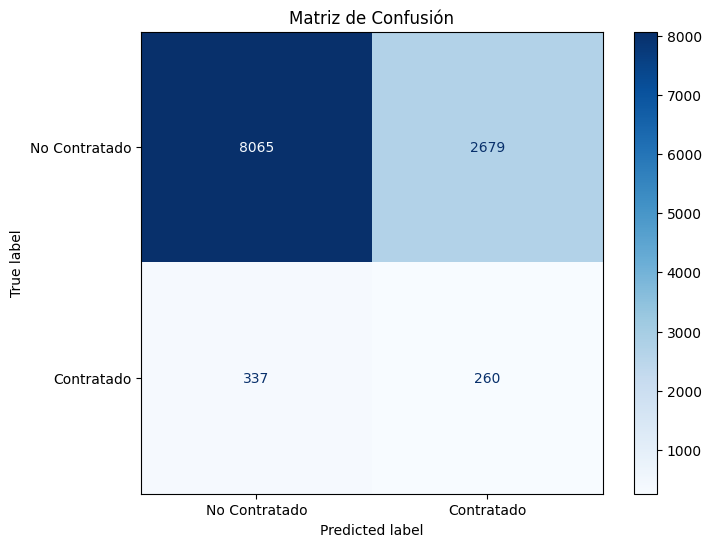

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Módulo 3, Paso 3: Evaluar el Rendimiento del Modelo ---

# 1. Hacer predicciones en el set de prueba (datos que el modelo nunca ha visto)
print("Haciendo predicciones en el set de prueba (el 'examen final')...")
y_pred = model.predict(X_test)

# 2. Mostrar el Informe de Clasificación
print("\n--- Informe de Clasificación ---")
# Este informe nos da las métricas clave para cada clase (0 y 1).
print(classification_report(y_test, y_pred, target_names=['No Contratado (0)', 'Contratado (1)']))

# 3. Mostrar la Matriz de Confusión de forma visual
print("\n--- Matriz de Confusión ---")
# La diagonal (de arriba-izquierda a abajo-derecha) muestra los aciertos.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Contratado', 'Contratado'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d') # 'd' para mostrar números enteros
plt.title('Matriz de Confusión')
plt.show()

In [27]:
import re
from datetime import datetime

print("Restaurando la columna 'cv_pt' para el análisis...")
# El df_maestro todavía tiene la columna original. La copiamos a nuestro set de features.
df_final_features['cv_pt'] = df_maestro['cv_pt']

print("Iniciando extracción de años de experiencia del texto de los CVs...")

def calcular_experiencia(cv_texto):
    if not isinstance(cv_texto, str):
        return 0

    # Expresión regular mejorada para buscar patrones de fecha como 01/2020, jan/20, etc.
    expresion = r'(\d{1,2}[/-]\d{4}|\w+\s*[/de]*\s*\d{4}|\d{4})\s*–\s*(\d{1,2}[/-]\d{4}|\w+\s*[/de]*\s*\d{4}|\d{4}|presente|atual|actual|present)'
    
    matches = re.findall(expresion, cv_texto, re.IGNORECASE)
    
    total_meses = 0
    ano_actual = datetime.now().year
    mes_actual = datetime.now().month

    for inicio_str, fin_str in matches:
        try:
            # --- Procesar fecha de inicio ---
            # Extraer solo el año para simplificar
            ano_inicio = int(re.findall(r'\d{4}', inicio_str)[0])

            # --- Procesar fecha de fin ---
            ano_fin = 0
            if fin_str.lower() in ['presente', 'atual', 'actual', 'present']:
                ano_fin = ano_actual
            else:
                ano_fin = int(re.findall(r'\d{4}', fin_str)[0])
            
            # Solo calculamos si el rango es lógico
            if ano_fin >= ano_inicio:
                duracion_anos = ano_fin - ano_inicio
                total_meses += duracion_anos * 12
        except (ValueError, TypeError, IndexError):
            continue
            
    return round(total_meses / 12, 1)

# Aplicamos la función a la columna 'cv_pt' (el nombre correcto)
df_final_features['anos_experiencia'] = df_final_features['cv_pt'].apply(calcular_experiencia)

# Ahora que ya la usamos, eliminamos la columna de texto para quedarnos solo con números
df_final_features.drop(columns=['cv_pt'], inplace=True)

print("\n¡Nueva feature 'anos_experiencia' creada con éxito!")

# Verifiquemos cómo se ve y si se correlaciona con ser contratado
display(df_final_features[['anos_experiencia', 'contratado']].head())
print("\nExperiencia promedio para cada clase:")
display(df_final_features.groupby('contratado')['anos_experiencia'].mean())

Restaurando la columna 'cv_pt' para el análisis...
Iniciando extracción de años de experiencia del texto de los CVs...

¡Nueva feature 'anos_experiencia' creada con éxito!


,anos_experiencia,contratado
0,0.0,0
1,29.0,0
2,2.0,1
3,0.0,0
4,0.0,0



Experiencia promedio para cada clase:


contratado
0    5.991120
1    3.980563
Name: anos_experiencia, dtype: float64

Iniciando re-entrenamiento con la nueva feature 'anos_experiencia'...


C:\Users\bolau\Documents\Datathon\datathon-recruitment-ai\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


¡Modelo v2 entrenado con éxito!

--- Informe de Clasificación (Modelo v2) ---
                   precision    recall  f1-score   support

No Contratado (0)       0.96      0.75      0.84     10744
   Contratado (1)       0.09      0.45      0.15       597

         accuracy                           0.73     11341
        macro avg       0.53      0.60      0.50     11341
     weighted avg       0.92      0.73      0.80     11341


--- Matriz de Confusión (Modelo v2) ---


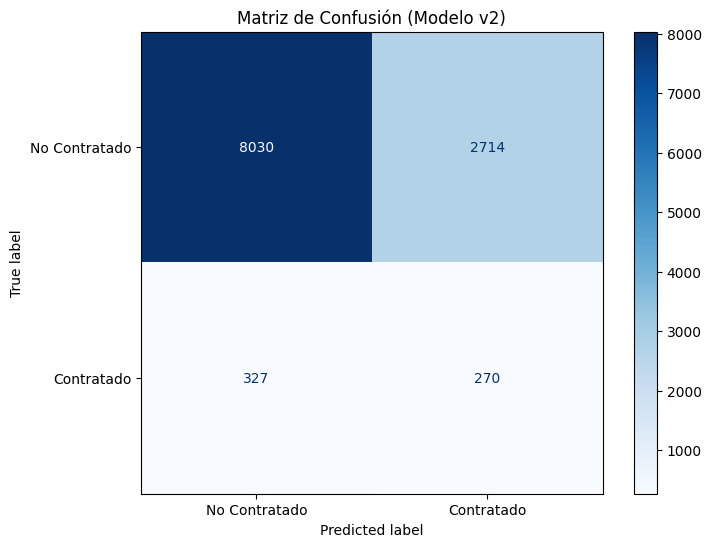

In [28]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- RE-ENTRENAMIENTO Y RE-EVALUACIÓN DEL MODELO (VERSIÓN 2.0) ---

print("Iniciando re-entrenamiento con la nueva feature 'anos_experiencia'...")

# 1. Preparar los datos (ahora X incluye la nueva feature)
y = df_final_features['contratado']
X = df_final_features.drop(columns=[
    'contratado', 'id_vaga', 'codigo_profissional', 'data_criacao', 
    'data_atualizacao', 'data_nascimento'
])
X = X.select_dtypes(include=['number', 'bool']).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 2. Entrenar el nuevo modelo
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

model_v2 = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False 
)

model_v2.fit(X_train, y_train)
print("¡Modelo v2 entrenado con éxito!")

# 3. Evaluar el nuevo modelo
print("\n--- Informe de Clasificación (Modelo v2) ---")
y_pred_v2 = model_v2.predict(X_test)
print(classification_report(y_test, y_pred_v2, target_names=['No Contratado (0)', 'Contratado (1)']))

print("\n--- Matriz de Confusión (Modelo v2) ---")
cm_v2 = confusion_matrix(y_test, y_pred_v2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_v2, display_labels=['No Contratado', 'Contratado'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matriz de Confusión (Modelo v2)')
plt.show()

Iniciando ajuste de hiperparámetros... (Puede tardar mucho tiempo)
Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\bolau\Documents\Datathon\datathon-recruitment-ai\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:13:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Mejores parámetros encontrados:
{'subsample': 0.8, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.9}

¡Ajuste completado! Ahora evaluemos este nuevo 'modelo v3 optimizado'.

--- Informe de Clasificación (Modelo v3 - Optimizado) ---
                   precision    recall  f1-score   support

No Contratado (0)       0.96      0.64      0.77     10744
   Contratado (1)       0.08      0.54      0.13       597

         accuracy                           0.63     11341
        macro avg       0.52      0.59      0.45     11341
     weighted avg       0.92      0.63      0.73     11341


--- Matriz de Confusión (Modelo v3 - Optimizado) ---


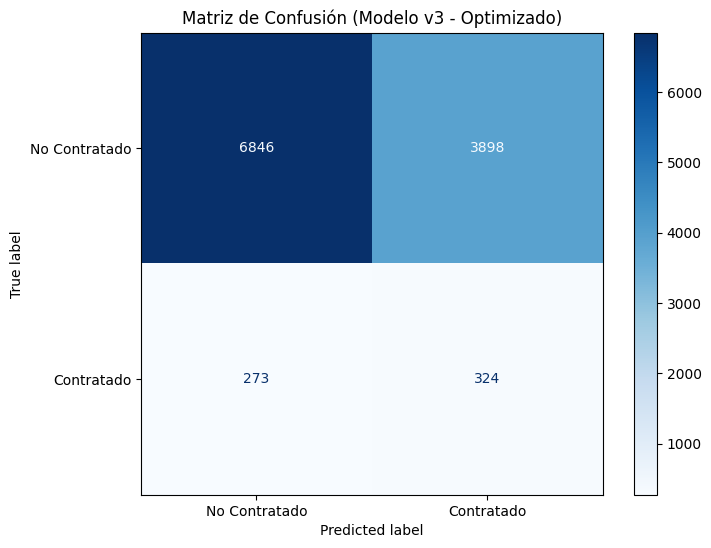

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# --- MEJORA DEL MODELO: AJUSTE DE HIPERPARÁMETROS ---

# 1. Definir el espacio de búsqueda de parámetros
# Estos son algunos de los 'ajustes' más importantes de XGBoost que probaremos.
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# 2. Inicializar la Búsqueda Aleatoria
# n_iter=20: Probará 20 combinaciones al azar. Es un buen balance entre búsqueda y tiempo.
# scoring='recall': ¡Nuestro objetivo es maximizar el RECALL para la clase positiva!
# cv=3: Usará validación cruzada para asegurar que los resultados sean estables.
# verbose=2: Mostrará información mientras se ejecuta.
random_search = RandomizedSearchCV(
    estimator=model_v2, # Usamos nuestro modelo v2 como base
    param_distributions=param_grid,
    n_iter=20, 
    scoring='recall', 
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Usa todos los núcleos de tu procesador para ir más rápido
)

# 3. Ejecutar la búsqueda (ESTE ES EL PASO LENTO)
print("Iniciando ajuste de hiperparámetros... (Puede tardar mucho tiempo)")
random_search.fit(X_train, y_train)

# 4. Obtener y guardar nuestro mejor modelo
print("\nMejores parámetros encontrados:")
print(random_search.best_params_)

model_v3_tuned = random_search.best_estimator_

print("\n¡Ajuste completado! Ahora evaluemos este nuevo 'modelo v3 optimizado'.")

# 5. Evaluar el nuevo mejor modelo
y_pred_v3 = model_v3_tuned.predict(X_test)
print("\n--- Informe de Clasificación (Modelo v3 - Optimizado) ---")
print(classification_report(y_test, y_pred_v3, target_names=['No Contratado (0)', 'Contratado (1)']))

# Matriz de Confusión para el modelo v3
print("\n--- Matriz de Confusión (Modelo v3 - Optimizado) ---")
cm_v3 = confusion_matrix(y_test, y_pred_v3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_v3, display_labels=['No Contratado', 'Contratado'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matriz de Confusión (Modelo v3 - Optimizado)')
plt.show()

In [31]:
import joblib

# --- CORRECCIÓN: Guardar los Artefactos con la Ruta Correcta ---

# Añadimos '../' para subir un nivel desde la carpeta /notebooks a la raíz del proyecto
ruta_modelo_final = '../models/recruitment_model_final.joblib'
joblib.dump(model_v3_tuned, ruta_modelo_final)

# Hacemos lo mismo para el archivo de columnas
model_columns = X_train.columns
ruta_columnas = '../models/model_columns.joblib'
joblib.dump(model_columns, ruta_columnas)

print(f"Modelo final guardado en: {ruta_modelo_final}")
print(f"Columnas del modelo guardadas en: {ruta_columnas}")
print("\n¡Ahora sí estamos listos para construir la aplicación!")

Modelo final guardado en: ../models/recruitment_model_final.joblib
Columnas del modelo guardadas en: ../models/model_columns.joblib

¡Ahora sí estamos listos para construir la aplicación!


In [2]:
# --- PASO FINAL EN EL NOTEBOOK ---

print("Creando el dataset final para la aplicación...")

# df_final_features ya tiene todas nuestras columnas numéricas y de features.
df_app = df_final_features.copy()

# Le añadimos de vuelta algunas columnas de texto desde df_maestro para poder mostrarlas en la app.
df_app['codigo_profissional'] = df_maestro['codigo_profissional']
df_app['cv_pt'] = df_maestro['cv_pt']
df_app['titulo_vaga'] = df_maestro['titulo_vaga']
df_app['id_vaga'] = df_maestro['id_vaga']

# Guardamos este nuevo DataFrame completo en la carpeta raíz del proyecto.
# Usamos '../' para subir desde /notebooks a la carpeta raíz.
df_app.to_csv('../app_final_dataset.csv', index=False)

print("\n¡Dataset final 'app_final_dataset.csv' guardado en la raíz del proyecto!")
print("Este es el único archivo CSV que nuestra aplicación necesitará.")

Creando el dataset final para la aplicación...


NameError: name 'df_final_features' is not defined